## K Nearest Neighbours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

In [2]:
loan=pd.read_csv("./lending_club_loan_two.csv")
loan = loan.sample(n = 5000)

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 267764 to 107556
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             5000 non-null   float64
 1   term                  5000 non-null   object 
 2   int_rate              5000 non-null   float64
 3   installment           5000 non-null   float64
 4   grade                 5000 non-null   object 
 5   sub_grade             5000 non-null   object 
 6   emp_title             4690 non-null   object 
 7   emp_length            4760 non-null   object 
 8   home_ownership        5000 non-null   object 
 9   annual_inc            5000 non-null   float64
 10  verification_status   5000 non-null   object 
 11  issue_d               5000 non-null   object 
 12  loan_status           5000 non-null   object 
 13  purpose               5000 non-null   object 
 14  title                 4979 non-null   object 
 15  dti           

In [4]:
loan.iloc[0:10,0:10]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc
267764,20000.0,36 months,18.99,733.02,E,E1,machinist,10+ years,MORTGAGE,57000.0
128929,21000.0,60 months,17.99,533.15,D,D2,Lacks Enterprises,< 1 year,MORTGAGE,78000.0
298572,12000.0,36 months,13.67,408.22,B,B5,Office Manager,8 years,RENT,70500.0
274155,25000.0,36 months,11.99,830.24,B,B3,Consultant,4 years,RENT,74000.0
67101,10000.0,60 months,15.61,241.12,D,D1,IT Manager,5 years,OWN,50000.0
100035,6000.0,36 months,15.10,208.29,C,C2,Admission registered nurse,1 year,RENT,72000.0
230898,8000.0,36 months,17.57,287.50,D,D4,Respiratory Therapist,3 years,RENT,45000.0
342398,19075.0,36 months,11.55,629.48,B,B3,Cloverland Dairy,10+ years,RENT,43000.0
198986,11200.0,36 months,13.11,377.97,B,B4,Areva,5 years,MORTGAGE,65000.0
286911,8000.0,36 months,7.69,249.55,A,A4,Manager,10+ years,MORTGAGE,70000.0


In [5]:
loan.iloc[0:10,10:]

,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
267764,Verified,Jun-2014,Charged Off,major_purchase,Major purchase,1.89,Jul-2002,9.0,0.0,500.0,1.2,14.0,f,INDIVIDUAL,3.0,0.0,10595 Jackson Underpass Apt. 772\r\nSimmonsbor...
128929,Verified,Apr-2012,Fully Paid,other,Taxes,26.11,Aug-1996,6.0,0.0,13143.0,94.6,20.0,f,INDIVIDUAL,0.0,0.0,USCGC Jones\r\nFPO AE 22690
298572,Source Verified,Nov-2013,Charged Off,credit_card,Credit card refinancing,11.91,Aug-2006,13.0,0.0,9230.0,41.0,20.0,w,INDIVIDUAL,2.0,0.0,"69271 Meyer Overpass\r\nWest Sarah, MO 11650"
274155,Verified,Jan-2014,Fully Paid,debt_consolidation,Debt consolidation,20.40,May-2000,9.0,0.0,26275.0,94.5,17.0,f,INDIVIDUAL,0.0,0.0,"545 Erika Turnpike\r\nSouth Lindsay, AL 00813"
67101,Source Verified,Mar-2015,Fully Paid,credit_card,Credit card refinancing,13.03,Jul-2008,5.0,0.0,9848.0,80.1,11.0,f,INDIVIDUAL,0.0,0.0,"4435 Cobb Orchard\r\nEast Mariahfort, GA 29597"
100035,Verified,Oct-2013,Charged Off,debt_consolidation,Credit card debt,11.62,Aug-2005,6.0,0.0,7060.0,95.4,19.0,w,INDIVIDUAL,0.0,0.0,"926 Lisa Harbors Suite 254\r\nElizabethview, M..."
230898,Source Verified,Aug-2014,Fully Paid,major_purchase,Major purchase,19.52,Jul-1997,7.0,3.0,5980.0,39.3,9.0,f,INDIVIDUAL,0.0,0.0,"67401 Gonzalez Path\r\nParkmouth, LA 05113"
342398,Not Verified,Sep-2013,Fully Paid,debt_consolidation,Debt consolidation,25.13,Jun-2000,10.0,0.0,15882.0,75.3,20.0,f,INDIVIDUAL,0.0,0.0,"2701 Taylor Circles\r\nWest Kevin, TX 29597"
198986,Not Verified,Apr-2012,Fully Paid,debt_consolidation,Debit Consolidation,24.92,Sep-2001,12.0,0.0,8081.0,66.2,37.0,f,INDIVIDUAL,1.0,0.0,"188 Jeanette Underpass\r\nDuartefort, LA 22690"
286911,Not Verified,Jul-2014,Fully Paid,debt_consolidation,Debt consolidation,16.96,Oct-1998,6.0,0.0,19432.0,87.9,11.0,w,INDIVIDUAL,3.0,0.0,"542 Thomas Overpass Suite 319\r\nChurchtown, I..."


### Preprocessing of the data

In [6]:
loan['loan_status'].replace(to_replace='Fully Paid', value=1, inplace=True)
loan['loan_status'].replace(to_replace='Charged Off', value=0, inplace=True)

In [7]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title               310
emp_length              240
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    21
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                3
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                462
pub_rec_bankruptcies      4
address                   0
dtype: int64

In [8]:
100* loan.isnull().sum()/len(loan)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               6.20
emp_length              4.80
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.42
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.06
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.24
pub_rec_bankruptcies    0.08
address                 0.00
dtype: float64

In [9]:
loan['emp_title'].value_counts()

Teacher                                 52
Manager                                 46
RN                                      31
Registered Nurse                        28
Sales                                   27
                                        ..
lead equipment operator                  1
MVUSD                                    1
School District 12 Five Star Schools     1
Mail courier                             1
Nallard & LaPress Enterprises            1
Name: emp_title, Length: 3696, dtype: int64

There are too many unique job titles to convert to a dummy variable feature. Let's remove emp_title column.

In [10]:
loan = loan.drop('emp_title',axis=1)

In [11]:
emp_co = loan[loan['loan_status']==0].groupby("emp_length").count()['loan_status']
emp_fp = loan[loan['loan_status']==1].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.323671
10+ years    0.223451
2 years      0.247839
3 years      0.203704
4 years      0.199234
5 years      0.213523
6 years      0.252381
7 years      0.208955
8 years      0.281915
9 years      0.173913
< 1 year     0.254545
Name: loan_status, dtype: float64

Charge off rates are similar across all employment lengths. Dropping the emp_length column.

In [12]:
loan = loan.drop('emp_length',axis=1)

In [13]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    21
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                3
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                462
pub_rec_bankruptcies      4
address                   0
dtype: int64

In [14]:
loan.dropna(inplace=True)

In [15]:
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [16]:
loan['purpose'].head(10)

267764        major_purchase
128929                 other
298572           credit_card
274155    debt_consolidation
67101            credit_card
100035    debt_consolidation
230898        major_purchase
342398    debt_consolidation
198986    debt_consolidation
286911    debt_consolidation
Name: purpose, dtype: object

In [17]:
loan['title'].head(10)

267764             Major purchase
128929                      Taxes
298572    Credit card refinancing
274155         Debt consolidation
67101     Credit card refinancing
100035           Credit card debt
230898             Major purchase
342398         Debt consolidation
198986        Debit Consolidation
286911         Debt consolidation
Name: title, dtype: object

Title column is similar to the purpose column. Dropping the title column.

In [18]:
loan = loan.drop('title',axis=1)

In [19]:
loan['mort_acc'].value_counts()

0.0     1685
1.0      757
2.0      686
3.0      476
4.0      382
5.0      241
6.0      129
7.0       68
8.0       46
9.0       19
10.0      11
14.0       4
13.0       3
11.0       3
15.0       2
12.0       2
Name: mort_acc, dtype: int64

In [20]:
loan.corr()['mort_acc'].sort_values()

int_rate               -0.077169
dti                    -0.055410
pub_rec                -0.015835
pub_rec_bankruptcies   -0.007991
revol_util              0.007803
loan_status             0.070909
open_acc                0.112686
revol_bal               0.208211
installment             0.210001
loan_amnt               0.242695
annual_inc              0.283167
total_acc               0.370717
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [21]:
loan.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [22]:
loan['term'].value_counts()

 36 months    3445
 60 months    1069
Name: term, dtype: int64

In [23]:
loan['term'] = loan['term'].apply(lambda term: int(term[:3]))
loan['term']

267764    36
128929    60
298572    36
274155    36
67101     60
          ..
84711     60
290360    60
11497     36
200578    36
107556    36
Name: term, Length: 4514, dtype: int64

In [24]:
loan = loan.drop('grade',axis=1)

In [25]:
loan['home_ownership'].value_counts()

MORTGAGE    2344
RENT        1686
OWN          484
Name: home_ownership, dtype: int64

In [26]:
loan['home_ownership']=loan['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [27]:
loan['zip_code'] = loan['address'].apply(lambda address:address[-5:])

In [28]:
loan = loan.drop('issue_d',axis=1)

In [29]:
loan['earliest_cr_year'] = loan['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [30]:
loan.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address', 'zip_code'],
      dtype='object')

In [31]:
loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,zip_code,earliest_cr_year
267764,20000.0,36,18.99,733.02,E1,MORTGAGE,57000.0,Verified,0,major_purchase,...,500.0,1.2,14.0,f,INDIVIDUAL,3.0,0.0,10595 Jackson Underpass Apt. 772\r\nSimmonsbor...,30723,2002
128929,21000.0,60,17.99,533.15,D2,MORTGAGE,78000.0,Verified,1,other,...,13143.0,94.6,20.0,f,INDIVIDUAL,0.0,0.0,USCGC Jones\r\nFPO AE 22690,22690,1996
298572,12000.0,36,13.67,408.22,B5,RENT,70500.0,Source Verified,0,credit_card,...,9230.0,41.0,20.0,w,INDIVIDUAL,2.0,0.0,"69271 Meyer Overpass\r\nWest Sarah, MO 11650",11650,2006
274155,25000.0,36,11.99,830.24,B3,RENT,74000.0,Verified,1,debt_consolidation,...,26275.0,94.5,17.0,f,INDIVIDUAL,0.0,0.0,"545 Erika Turnpike\r\nSouth Lindsay, AL 00813",00813,2000
67101,10000.0,60,15.61,241.12,D1,OWN,50000.0,Source Verified,1,credit_card,...,9848.0,80.1,11.0,f,INDIVIDUAL,0.0,0.0,"4435 Cobb Orchard\r\nEast Mariahfort, GA 29597",29597,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84711,11000.0,60,20.75,296.05,E2,RENT,60000.0,Verified,1,other,...,11740.0,59.9,10.0,w,INDIVIDUAL,0.0,0.0,"9846 Rachel Key\r\nPort Christinaborough, NV 3...",30723,1994
290360,35000.0,60,16.99,869.66,D3,MORTGAGE,260000.0,Verified,1,debt_consolidation,...,20232.0,45.7,41.0,w,INDIVIDUAL,3.0,0.0,"8477 Tony Extension Suite 375\r\nWest Paul, AK...",48052,2001
11497,1200.0,36,22.90,46.39,E4,RENT,27000.0,Not Verified,1,debt_consolidation,...,7860.0,77.1,17.0,f,INDIVIDUAL,0.0,1.0,"346 Stone Stravenue\r\nWest Warren, VA 48052",48052,1982
200578,3000.0,36,15.80,105.18,C3,MORTGAGE,65000.0,Source Verified,1,credit_card,...,71811.0,97.0,23.0,f,INDIVIDUAL,3.0,1.0,"11878 Herring Rapid Apt. 712\r\nFordville, MN ...",22690,1988


In [32]:
loan.shape

(4514, 24)

In [33]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 267764 to 107556
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             4514 non-null   float64
 1   term                  4514 non-null   int64  
 2   int_rate              4514 non-null   float64
 3   installment           4514 non-null   float64
 4   sub_grade             4514 non-null   object 
 5   home_ownership        4514 non-null   object 
 6   annual_inc            4514 non-null   float64
 7   verification_status   4514 non-null   object 
 8   loan_status           4514 non-null   int64  
 9   purpose               4514 non-null   object 
 10  dti                   4514 non-null   float64
 11  earliest_cr_line      4514 non-null   object 
 12  open_acc              4514 non-null   float64
 13  pub_rec               4514 non-null   float64
 14  revol_bal             4514 non-null   float64
 15  revol_util    

In [34]:
y=loan['loan_status']

In [35]:
y.value_counts()

1    3616
0     898
Name: loan_status, dtype: int64

In [36]:
X = loan.drop(['loan_status'], axis=1)

In [37]:
X.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,zip_code,earliest_cr_year
267764,20000.0,36,18.99,733.02,E1,MORTGAGE,57000.0,Verified,major_purchase,1.89,...,500.0,1.2,14.0,f,INDIVIDUAL,3.0,0.0,10595 Jackson Underpass Apt. 772\r\nSimmonsbor...,30723,2002
128929,21000.0,60,17.99,533.15,D2,MORTGAGE,78000.0,Verified,other,26.11,...,13143.0,94.6,20.0,f,INDIVIDUAL,0.0,0.0,USCGC Jones\r\nFPO AE 22690,22690,1996
298572,12000.0,36,13.67,408.22,B5,RENT,70500.0,Source Verified,credit_card,11.91,...,9230.0,41.0,20.0,w,INDIVIDUAL,2.0,0.0,"69271 Meyer Overpass\r\nWest Sarah, MO 11650",11650,2006
274155,25000.0,36,11.99,830.24,B3,RENT,74000.0,Verified,debt_consolidation,20.40,...,26275.0,94.5,17.0,f,INDIVIDUAL,0.0,0.0,"545 Erika Turnpike\r\nSouth Lindsay, AL 00813",00813,2000
67101,10000.0,60,15.61,241.12,D1,OWN,50000.0,Source Verified,credit_card,13.03,...,9848.0,80.1,11.0,f,INDIVIDUAL,0.0,0.0,"4435 Cobb Orchard\r\nEast Mariahfort, GA 29597",29597,2008


In [38]:
X = X.drop(['address','earliest_cr_line','zip_code','earliest_cr_year','sub_grade'],axis=1)

In [39]:
X = pd.get_dummies(X, columns=['verification_status','application_type','initial_list_status','purpose','home_ownership'])

In [40]:
X.shape

(4514, 37)

In [41]:
X

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
267764,20000.0,36,18.99,733.02,57000.0,1.89,9.0,0.0,500.0,1.2,...,0,0,0,0,0,0,0,1,0,0
128929,21000.0,60,17.99,533.15,78000.0,26.11,6.0,0.0,13143.0,94.6,...,0,0,1,0,0,0,0,1,0,0
298572,12000.0,36,13.67,408.22,70500.0,11.91,13.0,0.0,9230.0,41.0,...,0,0,0,0,0,0,0,0,0,1
274155,25000.0,36,11.99,830.24,74000.0,20.40,9.0,0.0,26275.0,94.5,...,0,0,0,0,0,0,0,0,0,1
67101,10000.0,60,15.61,241.12,50000.0,13.03,5.0,0.0,9848.0,80.1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84711,11000.0,60,20.75,296.05,60000.0,5.38,8.0,0.0,11740.0,59.9,...,0,0,1,0,0,0,0,0,0,1
290360,35000.0,60,16.99,869.66,260000.0,32.24,18.0,1.0,20232.0,45.7,...,0,0,0,0,0,0,0,1,0,0
11497,1200.0,36,22.90,46.39,27000.0,27.16,11.0,1.0,7860.0,77.1,...,0,0,0,0,0,0,0,0,0,1
200578,3000.0,36,15.80,105.18,65000.0,17.37,8.0,1.0,71811.0,97.0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_f',
       'initial_list_status_w', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_house', 'purpose_major_purchase', 'purpose_medical',
       'purpose_moving', 'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

In [44]:
X_scaled=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.2,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3611, 38), (903, 38), (3611,), (903,))

### Apply KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean')

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

knn_report=classification_report(knn.predict(X_test), y_test)

knn_cm = confusion_matrix(knn.predict(X_test), y_test)

In [48]:
print(' KNN Report:\n', knn_report)

print(' KNN confusion Matrix:\n', knn_cm)

 KNN Report:
               precision    recall  f1-score   support

           0       0.14      0.22      0.17       109
           1       0.88      0.82      0.85       794

    accuracy                           0.75       903
   macro avg       0.51      0.52      0.51       903
weighted avg       0.80      0.75      0.77       903

 KNN confusion Matrix:
 [[ 24  85]
 [142 652]]


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
knn_gs=GridSearchCV(knn,{'n_neighbors': range(3,10),'metric':['euclidean','manhattan','minkowski']})

In [51]:
knn_gs.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=6),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(3, 10)})

In [52]:
knn_gs.best_score_

0.7650837988826816

In [53]:
knn_gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

In [49]:
knn=KNeighborsClassifier(n_neighbors=9,metric='euclidean')

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

knn_report=classification_report(knn.predict(X_test), y_test)

knn_cm = confusion_matrix(knn.predict(X_test), y_test)

In [52]:
print(' KNN Report:\n', knn_report)

print(' KNN confusion Matrix:\n', knn_cm)

 KNN Report:
               precision    recall  f1-score   support

           0       0.04      0.23      0.07        31
           1       0.97      0.82      0.89       872

    accuracy                           0.80       903
   macro avg       0.50      0.52      0.48       903
weighted avg       0.94      0.80      0.86       903

 KNN confusion Matrix:
 [[  7  24]
 [159 713]]


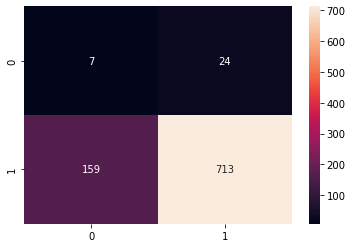

In [53]:
sns.heatmap(knn_cm, annot=True, fmt='0.0f');

ROC AUC score: 0.5217335010358094


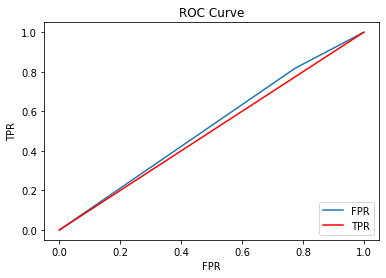

In [54]:
fpr, tpr, threshold = roc_curve(knn.predict(X_test), y_test)

plt.plot(fpr, tpr);
plt.plot([0,1], [0,1], color='r');
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.legend(["FPR", "TPR"], loc="lower right")

plt.title('ROC Curve');

score = roc_auc_score(knn.predict(X_test), y_test)

print('ROC AUC score:', score)